In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# step 0 fine_img_loss 1 fine_delta 2 depth_loss 3 fine_loss 4 fine_psnr 5 corase_img_loss 6 delta 7 loss 8 ###psnr 8 final_loss 9
data = []
index = -1
path = '../nerfServer_VPP/logs/NerfVPP_v23_12.log'
# path = '../logs/depth_room_v10_5.log'
# path = '../logs/depth_Alexander_v15_114.log'
with open(path) as f:
    for line in f:
        if "current global step is " in line:
            index+=1
            step_str = line.split("current global step is ")[1]
            step = int(step_str.split(" ")[0])
            data.append([index])
        if "img_loss is " in line:
            fine_img_str = line.split("img_loss is ")[1]
            fine_img_loss_str = fine_img_str.split(" , ")
            fine_img_loss = float(fine_img_loss_str[0])
            fine_delta = float(fine_img_loss_str[1].split(" is ")[1])
            data[index].append(fine_img_loss)
            data[index].append(fine_delta)
        if "depth loss is ," in line:
            depth_loss_str = line.split("depth loss is ,")[1]
            depth_loss_str = depth_loss_str.split(",")[0]
            depth_loss = float(depth_loss_str)
            data[index].append(depth_loss)
        if "fine loss : " in line:
            fine_loss_str = line.split("fine loss : ")[1]
            fine_loss = float(fine_loss_str.split(" fine img_psnr is ")[0])
            fine_psnr = float(fine_loss_str.split(" fine img_psnr is ")[1])
            data[index].append(fine_loss)
            data[index].append(fine_psnr)
        if "img_loss0 is " in line:
            corase_img_str = line.split("img_loss0 is ")[1]
            corase_img_loss_str = corase_img_str.split(" , ")
            corase_img_loss = float(corase_img_loss_str[0])
            corase_delta = float(corase_img_loss_str[1].split(" is ")[1])
#             data[index].append(corase_img_loss)
            data[index].append(corase_delta)
#         if "corase img_loss : " in line:
#             corase_loss_str = line.split("corase img_loss : ")[1]
#             corase_loss = float(corase_loss_str.split(" coarse img_psnr0 is ")[0])
#             corase_psnr = float(corase_loss_str.split(" coarse img_psnr0 is ")[1])
#             data[index].append(corase_loss)
#             data[index].append(corase_psnr)
        if "final loss is  tensor(" in line:
            loss_str = line.split("final loss is  tensor(")[1]
            loss = float(loss_str.split(", ")[0])
            data[index].append(loss)
            
len(data)

218505

In [2]:
data = pd.DataFrame(data,columns=['step','fine_img_loss','fine_delta','depth_loss','fine_loss','fine_psnr','corase_delta','final_loss'])
data.describe()

,step,fine_img_loss,fine_delta,depth_loss,fine_loss,fine_psnr,corase_delta,final_loss
count,218505.000000,218505.000000,218505.000000,218505.000000,218505.000000,218505.000000,218505.000000,218505.000000
mean,109252.000000,0.002746,0.008769,0.046482,-2.661343,32.436565,0.009278,-4.726565
std,63077.104622,0.008424,0.889615,0.031105,0.391829,3.317586,0.311334,0.631814
min,0.000000,0.000382,0.000575,0.006230,-3.355897,6.979543,0.002372,-5.867500
25%,54626.000000,0.000994,0.001040,0.027684,-2.942785,30.892601,0.004195,-5.175500
50%,109252.000000,0.001421,0.001435,0.038689,-2.759010,33.244099,0.005195,-4.885100
75%,163878.000000,0.002443,0.002456,0.056258,-2.478638,34.798023,0.007333,-4.437200
max,218504.000000,0.601405,193.332840,0.523573,3.142789,38.947025,65.426445,5.236600


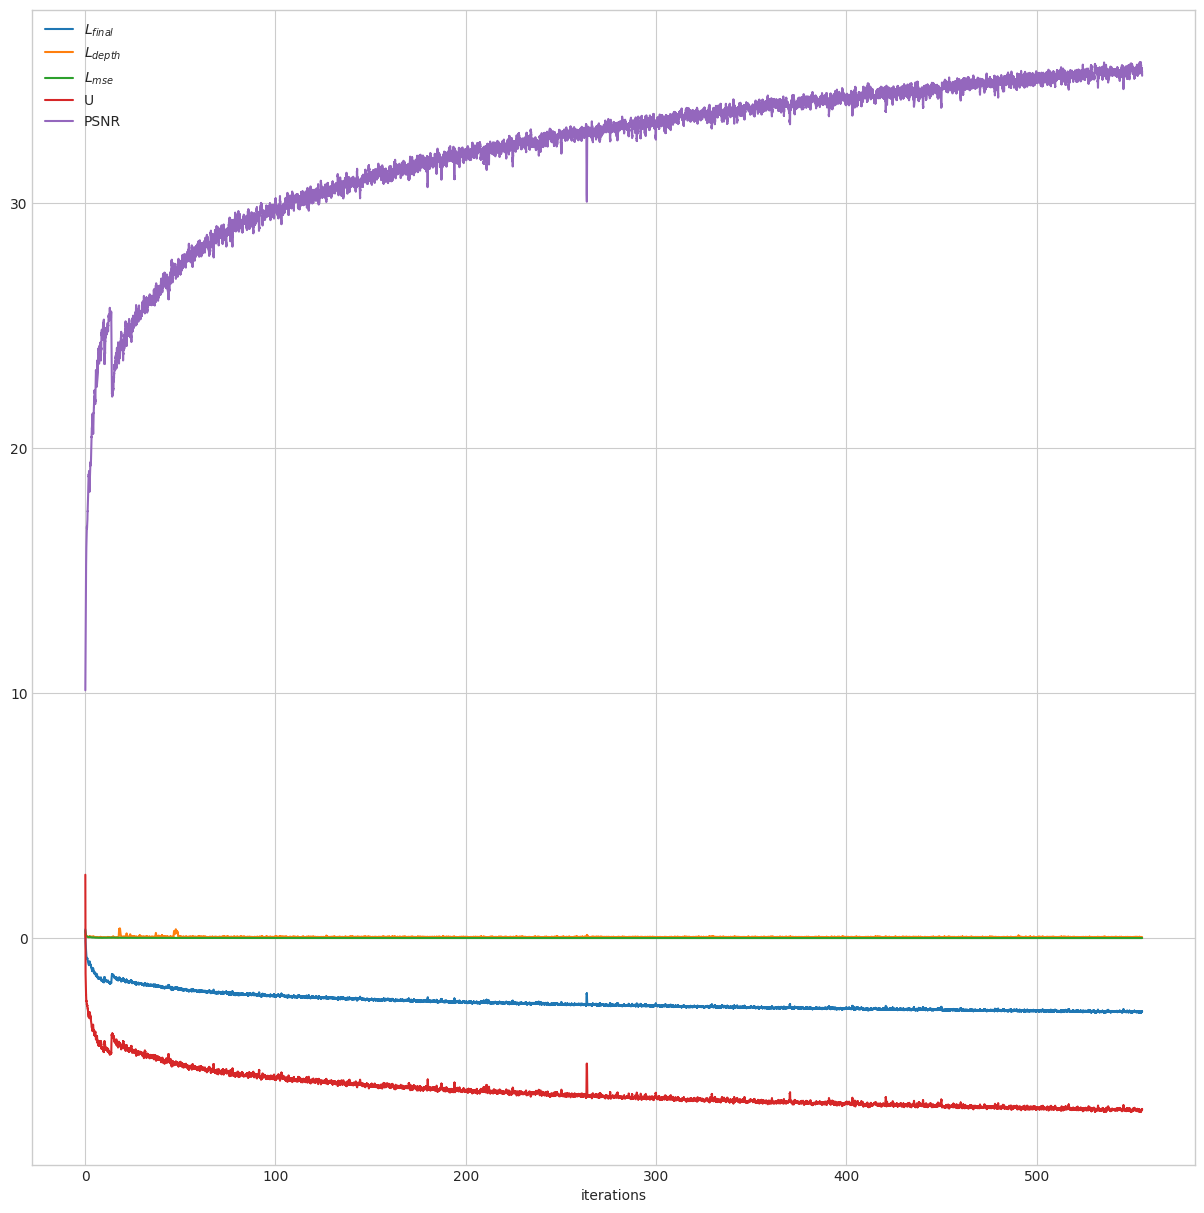

In [3]:
dd = data.rolling(100).mean()
dd = dd[:200000:]
fig = plt.figure(figsize=(15, 15), dpi=100) 
ax = plt.axes()
x = dd["step"]/6.0/60
y1 = dd['fine_loss']
y2 = dd['depth_loss']
y3 = dd['fine_img_loss']
y4 = np.log(dd['fine_delta'])
y5 = y3/(dd['fine_delta'] ** 2)
y6 = dd['fine_psnr']
plt.plot(x,y1,label='$L_{final}$')
plt.plot(x,y2,label='$L_{depth}$')
plt.plot(x,y3,label='$L_{mse}$')
plt.plot(x,y4,label='U')
# plt.plot(x,y5,label='R')
plt.plot(x,y6,label='PSNR')
plt.xlabel("min")
plt.legend()
# plt.show()